# 데이터 전처리

In [ ]:
cd 'data/rawdata'

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
bitcoin = pd.read_csv('Bitcoin.csv')

In [ ]:
bitcoin.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 04월 30일,"68,075,000","63,712,000","68,075,000","63,712,000",1.18K,6.85%
1,2021년 04월 29일,"63,710,000","64,100,000","64,100,000","63,710,000",0.92K,-0.63%
2,2021년 04월 28일,"64,116,000","64,767,000","64,767,000","64,064,000",0.91K,-0.96%
3,2021년 04월 27일,"64,738,000","64,199,000","64,738,000","64,146,000",0.88K,0.84%
4,2021년 04월 26일,"64,196,000","59,700,000","64,196,000","59,700,000",1.48K,7.54%


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1002 non-null   object
 1   종가      1002 non-null   object
 2   오픈      1002 non-null   object
 3   고가      1002 non-null   object
 4   저가      1002 non-null   object
 5   거래량     1002 non-null   object
 6   변동 %    1002 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


In [ ]:
community1 = pd.read_csv('유저데이터/User_data.csv')
community2 = pd.read_csv('유저데이터/User_data2.csv')

In [ ]:
community = pd.concat([community1, community2], axis=0)

In [ ]:
community.reset_index(inplace=True, drop=True)

In [ ]:
# 커뮤니티 글 개수 추출
community.groupby('날짜')['제목'].count().to_csv('../../output/community_counts_all.csv')

In [ ]:
def join_by_group(df, join, group_by, new_col):
    """
    df: 데이터프레임.
    join: 사용할 칼럼 두 개로 이루어진 리스트. 첫 칼럼은 nan이 없어야 함.
    group_by: 칼럼을 그룹별로 묶음.
    new_col: 새로 생성할 칼럼명.
    """
    df[new_col]=[str(df[join[0]][i]) if pd.isnull(df[join[1]][i]) else str(df[join[0]][i])+str(' ')+str(df[join[1]][i]) for i in range(len(df))]
    
    # 날짜별 글 개수에 영향을 받을 수 있으므로 동일한 날의 기사는 하나의 문장으로 변환
    tmp = df.groupby(group_by)[new_col].transform(lambda x: '; '.join(x))
    tmp.drop_duplicates(inplace=True)
    tmp = tmp.str.lower()
    
    df = pd.concat([df[group_by].drop_duplicates(), tmp], axis=1)
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)

    return df

In [ ]:
community = join_by_group(community, ['제목', '내용'], group_by='날짜', new_col='text')

In [ ]:
community

,날짜,text
0,2021.04.30,리플 사전심리 내용(시작) 리플사측 변호인이 우선 sec가 mou를 사용하여 연방법...
1,2021.04.29,코인 진짜 돈버는 사람 유형. 1. 작년 불황일때 사서 몇개월 묵히신 분.2. 상장...
2,2021.04.28,"[오늘의 날씨] 강원(28일, 수)…강한 바람 산불 주의 28일 강원지역은 대체로..."
3,2021.04.27,비트코인 저가매수세 유입 ‘급반등’…5만2000달러선 회복 비트코인이 저가 매수세의...
4,2021.04.26,오늘의 날씨 체크하세요 (대기 매우 건조) 전국 대부분 지역에 건조특보가 발효된 가...
...,...,...
990,2020.09.28,비트 60배 떡상가능하다고 함 장기적으로 금시총 절반이라도 따라잡는날 올거다 진...
991,2020.09.25,스테이킹이 먼가요? 스테이킹이 사서 가지고 있으면 이자 같은거 주는건가요?ylb 새...
992,2020.09.19,이 시점에 갯썸 서버 점검??? 이거 먼 일일까요?ㅋㅋㅋㅋㅋㅋ지금 팔아도 충분한데....
993,2020.09.12,세력이 방향을 결정한듯 하다 따흑.. ; 랩틸킬러형 시진핑 오지게 싫어하는...


In [ ]:
community.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      995 non-null    object
 1   text    995 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [ ]:
len(set(community['날짜']))

995

- 날짜 형식 통일

In [ ]:
bitcoin['날짜'] = [re.sub('년\ |월\ |일','.',i) for i in bitcoin['날짜']]

- 데이터 형태 변경

In [ ]:
bitcoin['변동 %'] = [re.sub('%','',i) for i in bitcoin['변동 %']]
bitcoin['변동 %'] = list(map(float, bitcoin['변동 %']))

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1002 non-null   object 
 1   종가      1002 non-null   object 
 2   오픈      1002 non-null   object 
 3   고가      1002 non-null   object 
 4   저가      1002 non-null   object 
 5   거래량     1002 non-null   object 
 6   변동 %    1002 non-null   float64
dtypes: float64(1), object(6)
memory usage: 54.9+ KB


## 변동성 범주화 및 데이터 병합

In [ ]:
# 변동성

# 0: 변동성이 크고 가격 감소 (-Inf, -1.314)
# 1: 변동성이 작고 가격 감소 [-1.314, 0)
# 2: 변동성이 작고 가격 증가 [0, 1.7]
# 3: 변동성이 크고 가격 증가 (1.7, Inf)

bitcoin['변동성'] = [0 if p < -1.314 else 1 if p < 0 else 2 if p <= 1.7 else 3 for p in bitcoin['변동 %']]

- 데이터 병합

In [ ]:
community['날짜'] = community['날짜']+'.'

In [ ]:
df = pd.merge(community, bitcoin[['날짜','변동성']],on='날짜')

In [ ]:
df

,날짜,text,변동성
0,2021.04.30.,리플 사전심리 내용(시작) 리플사측 변호인이 우선 sec가 mou를 사용하여 연방법...,3
1,2021.04.29.,코인 진짜 돈버는 사람 유형. 1. 작년 불황일때 사서 몇개월 묵히신 분.2. 상장...,1
2,2021.04.28.,"[오늘의 날씨] 강원(28일, 수)…강한 바람 산불 주의 28일 강원지역은 대체로...",1
3,2021.04.27.,비트코인 저가매수세 유입 ‘급반등’…5만2000달러선 회복 비트코인이 저가 매수세의...,2
4,2021.04.26.,오늘의 날씨 체크하세요 (대기 매우 건조) 전국 대부분 지역에 건조특보가 발효된 가...,3
...,...,...,...
987,2020.10.01.,현 정권에서 가상화폐 폭등장은 어려울 거 같음. 정부 눈치를 보는 은행들이 신규계...,1
988,2020.09.28.,비트 60배 떡상가능하다고 함 장기적으로 금시총 절반이라도 따라잡는날 올거다 진...,1
989,2020.09.25.,스테이킹이 먼가요? 스테이킹이 사서 가지고 있으면 이자 같은거 주는건가요?ylb 새...,1
990,2020.09.19.,이 시점에 갯썸 서버 점검??? 이거 먼 일일까요?ㅋㅋㅋㅋㅋㅋ지금 팔아도 충분한데....,2


In [ ]:
df.to_csv('../../output/community_merged.csv', index=False)

## 데이터 전처리 및 형태소 분석

In [ ]:
cd 'data/output'

In [ ]:
import pandas as pd

df = pd.read_csv('community_merged.csv')

In [ ]:
# 특수문자 제거
df['text'] = df['text'].apply(lambda x : re.sub('[-=+,;#/\?:^$.@*\"※~&ㆍ!│』\\‘|\<\>`\'…》“”【】’·()_\[\]↑↓│]',' ',str(x)))

In [ ]:
# # 단어 빈도수 확인

# tmp = df['text'].str.split()
# slist = [st for row in tmp for st in row]

# from collections import Counter

# words = sorted(Counter(slist).items(), key=lambda pair: pair[1], reverse=True)
# pd.DataFrame(words,
#              columns=['word', 'counts']).to_csv('word_list_community.csv', index=False)

### 형태소 분석

In [ ]:
def posTagger(series, tag_list=['NNG', 'NNP', 'NN', 'NNS']): 

    import pandas as pd
    import nltk
    from konlpy.tag import Mecab
        
    mecab = Mecab()

    nouns = []
    for idx in range(len(series)):
        noun_list = []
        # 과제명과 키워드에서 명사를 추출한다.
        series[idx] = series[idx].replace('암호 화폐', '암호화폐').replace('블록 체인', '블록체인').replace('가상 화폐', '가상화폐').replace('비트 코인', '비트코인').replace('이더 리움', '이더리움')
        words = str(series[idx])
        words = words.lower()
        pos = mecab.pos(words)

        for word, tag in pos:
            if tag in tag_list:
                noun_list.append(word)
            if tag in ['SL']: # 외국어의 경우 nltk 형태소 분석기를 사용하여 추출한다.
                if word != 'nan':
                    pos = nltk.pos_tag(word.split())
                    for word, tag in pos:
                        if tag in tag_list:
                            noun_list.append(word)
            
        nouns.append(' '.join(noun_list))

    return nouns

#### 명사

In [ ]:
tmp = posTagger(df['text'], tag_list=['NNG', 'NNP', 'NN', 'NNS'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df['nouns'] = tmp

In [ ]:
df.tail()

,날짜,text,변동성,nouns
987,2020.10.01.,현 정권에서 가상화폐 폭등장은 어려울 거 같음 정부 눈치를 보는 은행들이 신규계...,1,정권 가상화폐 폭 등장 정부 눈치 은행 신규 계좌 미국 스위스 경우 은행 가상화폐 ...
988,2020.09.28.,비트 60배 떡상가능하다고 함 장기적으로 금시총 절반이라도 따라잡는날 올거다 진...,1,비트 배 떡상 가능 장기 금시 절반 날 존버 상승장 그레이 스케일 비트 풀매수 하락...
989,2020.09.25.,스테이킹이 먼가요 스테이킹이 사서 가지고 있으면 이자 같은거 주는건가요 ylb 새...,1,스테이 킹 가요 스테이킹 이자 ylb 우상 향중 이더 매수 스테이킹 적금 비교 얼마...
990,2020.09.19.,이 시점에 갯썸 서버 점검 이거 먼 일일까요 ㅋㅋㅋㅋㅋㅋ지금 팔아도 충분한데 ...,2,시점 갯 썸 서버 점검 일 휴
991,2020.09.12.,세력이 방향을 결정한듯 하다 따흑 랩틸킬러형 시진핑 오지게 싫어하는...,2,세력 방향 결정 랩 틸 킬러 시진핑 랩 틸 킬러 중국인 오해 미안 시진핑 애미 시진...


In [ ]:
df.to_csv('community_nouns_text_pos_tagged.csv', index=False)

#### 명사, 동사, 형용사

In [ ]:
tmp = posTagger(df['text'], tag_list=['NNG', 'NNP', 'NN', 'NNS', 'VV', 'VA'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
tmp[1]

'코인 돈 버 사람 유형 작년 불황 때 사 묵히 상장 메타 보따리 하 해외 시세 밝 김치 묻 inch 각종 스왑 디파이 공부 스윙 단타 하 텔 방 영어 코인 방 정보 시간 타 타고 말재주 선동 기막히 기타 그동안 많 일 있 저번 주 주말 기점 알트 폭 등장 이후 도지 사태 터 키 폐쇄 바이든 세금 문제 비트 폭락 코린이 피해 보이 각국 기득 싸움 시작 보이 비트 우상 향 아침 바이든 연설 끝나 악재 소멸 보이 기존 리더 따르 알트 폭 때 정리 올라가 코인 없 비캐 정도 단기 잡 이더 잡 단기 목표 차익 실현 없 하 하 홀딩 추천 드리 고점 동안 글 많 쓰 작성 없 다음 조심 지속 글 사태 원인 개 잡코 도지 광기 제재 시작 코인 쳐다보 알 악재 이상 악재 아침 바이든 연설 이목 내용 알 내용 타격 없 상승장 예측 바이든 부유층 자본 소득세 배 인상 가상화폐 전체 하락장 발생 고래 패닉셀 하 이후 비트코인 우상 향 바이낸스 매수 볼륨 증가 일부 고래 빠지 저점 판단 줍 투자자 대부분 jp모건 여름 비트코인 펀드 출시 예고 넥슨 김정주 비트코인 가량 매수 테슬라 어치 비트코인 보유 증명 점 기관 고래 살 비트코인 우상 향 예상 발생 결과 전체 메이저 코인 상승세 예상 결론 메이저 저점 형 주 워라 알트코인 타이밍 최근 젠서 다단계 이슈 보 폴라리스 위쇼 오로라 네스 트리 문제 되 알트코인 많 폴라리스 개미 털 요즘 얘기 나오 조심 폴라리스 공식 텔 방 문 닫 유통량 가격 덤핑 금감원 눈 불키 사기 재단 찾아다니 보 업비트 빗썸 상장 유의 지정 많 투자 전하 하 맞 메이저 타자 형 지금 악재 같 코인 집중 부자 증세 이목 내용 없 중국 견제 최저 시급 인상 부분 핵심 내용 하 소득세 인상 없 위 언급 악재 악재 박상기 나 갈치 밑 끝 드립 치 악재 입 딘 이제 호재 보이 고점 힘차 날갯짓 하리 독일 호재 유럽 최대 국가 독일 터키 호재 들려오 국내 이상 악재 나오 그러 이상 걱정 성 하 리플 깨 봄 바이낸스 차트 매수 깊이 깊 오늘 대체 오늘 대체 코인 오후 되 짬

In [ ]:
df['nouns'] = tmp

In [ ]:
df.tail()

,날짜,text,변동성,nouns
987,2020.10.01.,현 정권에서 가상화폐 폭등장은 어려울 거 같음 정부 눈치를 보는 은행들이 신규계...,1,정권 가상화폐 폭 등장 같 정부 눈치 보 은행 신규 계좌 열 미국 스위스 경우 은행...
988,2020.09.28.,비트 60배 떡상가능하다고 함 장기적으로 금시총 절반이라도 따라잡는날 올거다 진...,1,비트 배 떡상 가능 장기 금시 절반 따라잡 날 존버 상승장 그레이 스케일 비트 풀매...
989,2020.09.25.,스테이킹이 먼가요 스테이킹이 사서 가지고 있으면 이자 같은거 주는건가요 ylb 새...,1,스테이 킹 가요 스테이킹 사 이자 같 주 ylb 우상 향중 이더 매수 스테이킹 적금...
990,2020.09.19.,이 시점에 갯썸 서버 점검 이거 먼 일일까요 ㅋㅋㅋㅋㅋㅋ지금 팔아도 충분한데 ...,2,시점 갯 썸 서버 점검 일 팔 휴
991,2020.09.12.,세력이 방향을 결정한듯 하다 따흑 랩틸킬러형 시진핑 오지게 싫어하는...,2,세력 방향 결정 하 랩 틸 킬러 시진핑 오지 싫 하 랩 틸 킬러 중국인 오해 미안 ...


In [ ]:
df.to_csv('community_all_text_pos_tagged.csv', index=False)

# 감성사전 구축

### 명사

In [ ]:
cd 'data/output'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pos = 'nouns'
df = pd.read_csv('community_'+pos+'_text_pos_tagged.csv')
print(df['변동성'].value_counts())

2    296
1    229
3    222
0    214
Name: 변동성, dtype: int64


In [ ]:
# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

In [ ]:
df

,날짜,text,변동성,nouns,변동성_1,변동성_크기,변동성_방향
0,2021.04.30.,리플 사전심리 내용 시작 리플사측 변호인이 우선 sec가 mou를 사용하여 연방법...,3,리플 사전 심리 내용 시작 리플 변호인 sec mou 사용 연방 법 위반 리플 파트...,1.0,1,1
1,2021.04.29.,코인 진짜 돈버는 사람 유형 1 작년 불황일때 사서 몇개월 묵히신 분 2 상장...,1,코인 돈 사람 유형 작년 불황 때 상장 메타 보따리 해외 시세 김치 inch 각종 ...,NaN,0,0
2,2021.04.28.,오늘의 날씨 강원 28일 수 강한 바람 산불 주의 28일 강원지역은 대체로...,1,오늘 날씨 강원 수 바람 산불 주의 강원 지역 구름 가운데 바람 예보 산불 주의 필...,NaN,0,0
3,2021.04.27.,비트코인 저가매수세 유입 급반등 5만2000달러선 회복 비트코인이 저가 매수세의...,2,비트코인 매수세 유입 급반등 선 회복 비트 코인 매수세 유입 급반등 선 돌파 블룸 ...,NaN,0,1
4,2021.04.26.,오늘의 날씨 체크하세요 대기 매우 건조 전국 대부분 지역에 건조특보가 발효된 가...,3,오늘 날씨 체크 대기 건조 전국 대부분 지역 건조 특보 발효 가운데 대기 건조 산불...,1.0,1,1
...,...,...,...,...,...,...,...
956,2018.08.05.,차트공부하시는분들 유튜브에 어떤 분의 차트 강의입니다 유료방아니고 뭐 비밀기술 이딴...,2,차트 공부 유튜브 차트 강의 유료 방 비밀 기술 순수 목적 공부 도움 곳 공유 ht...,NaN,0,1
957,2018.08.04.,스타벅스 마이크로소프트와 손잡고 빗썸 또 파티 열렸네요 ㅋㅋ 일단 또 당분간...,0,스타 벅스 마이크 소프트 손잡고 빗썸 파티 빗썸 입출금 확정 장난질 그새 이오타 펌...,0.0,1,0
958,2018.08.03.,리플 보유자분들 함꼐 희망회로 ㄱㄱ 암호화폐 시장은 다시 하락 추세로 돌아선듯합니다...,0,리플 보유 자분 희망 회로 ㄱ ㄱ 암호화폐 시장 하락 추세 비트코인 수준 거래 며칠...,0.0,1,0
959,2018.08.02.,버지가 호잰가 펀디가 호잰가 남은 희망회로 몇가지 1 지금껀 조정이고 반등 새로...,1,버지 잰 펀디 잰 희망 회로 지금 조정 반 시작 가능 지금 상승장 이상 경우 정도 ...,NaN,0,0


In [ ]:
df = df[df['nouns'].notnull()]

#### 방법 1

##### 모델 학습 

In [ ]:
method_vol = '1'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_1'][df['변동성_1'].notnull()] # 변동성이 1, 2였던 경우 제거하고 모델 생성
feature = df['nouns'][df['변동성_1'].notnull()]

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.95, 0.98, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.0005, 0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 

In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.0005, 0.001, 0.0013],
 'el_clf__l1_ratio': [0.95, 0.98, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s


done in 16.089s

Best score: 0.564
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.95
	tfidf_vect__min_df: 2
	tfidf_vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   16.0s finished


In [ ]:
model = grid_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.95, learning_rate='optimal',
                   

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5267175572519084


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 99 variables and eliminated the other 2525 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출 - 방향

In [ ]:
import pickle

# 감성 지수 불러오기
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            sentence = str(sentence)
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            sentence = str(sentence)
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 959/959 [00:00<00:00, 4482.88it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


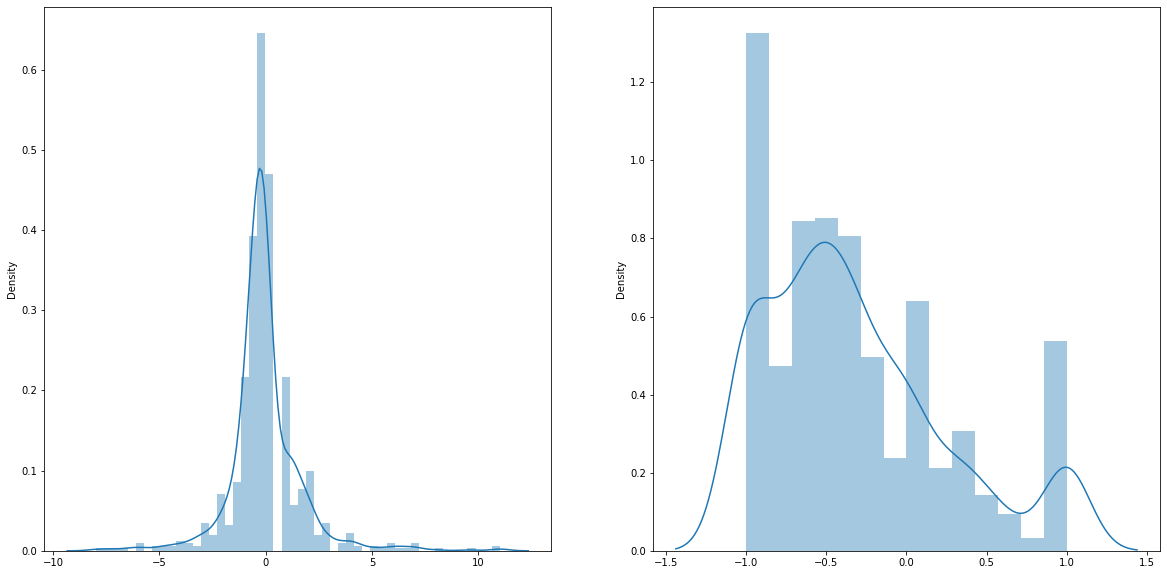

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 959/959 [00:00<00:00, 1187.83it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


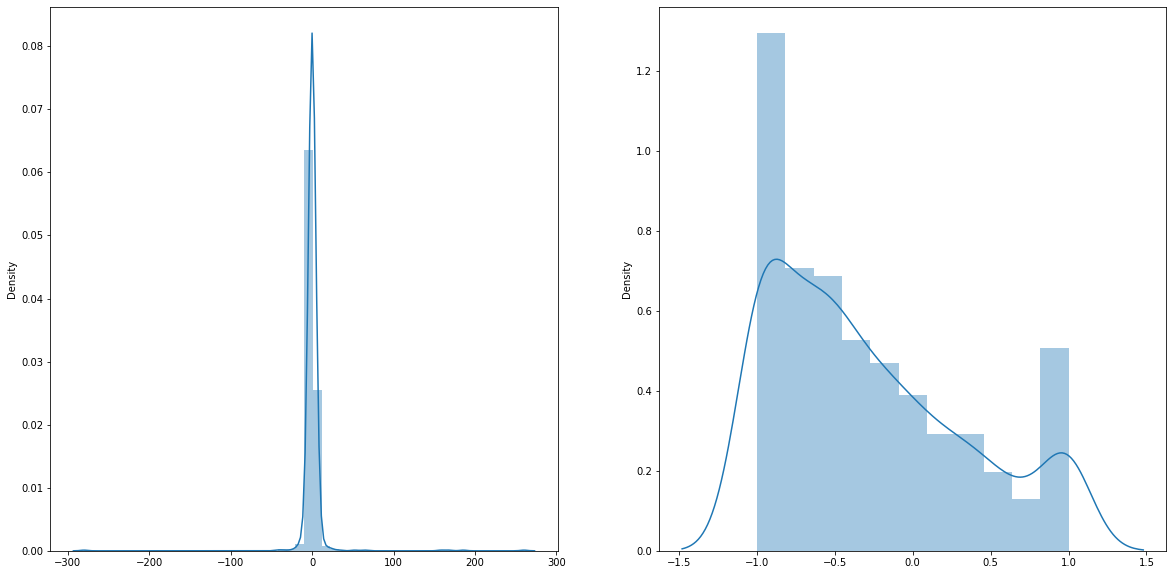

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

#### 방법 2

##### 모델 학습 - 크기

In [ ]:
method_vol = '2_크기'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_크기']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.093, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013],
 'el_clf__l1_ratio': [0.093, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s


done in 23.915s

Best score: 0.532
Best parameters set:
	el_clf__alpha: 0.001
	el_clf__l1_ratio: 1
	tfidf_vect__min_df: 1
	tfidf_vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.8s finished


In [ ]:
model = grid_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=1, learning_rate='optimal', loss='log',
           

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5381944444444444


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 36 variables and eliminated the other 10711 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)


##### score 산출 - 크기

In [ ]:
import pickle

# 감성 지수 불러오기
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
coef[coef['score']!=0].sort_values(by='score')

,score
블록,-1.261251
장기,-0.873489
비트코인,-0.823205
대가리,-0.663441
블록체인,-0.528953
리퍼,-0.497476
저점,-0.454965
바이,-0.405753
수익,-0.387389
차트,-0.202818


In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 959/959 [00:00<00:00, 8718.15it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


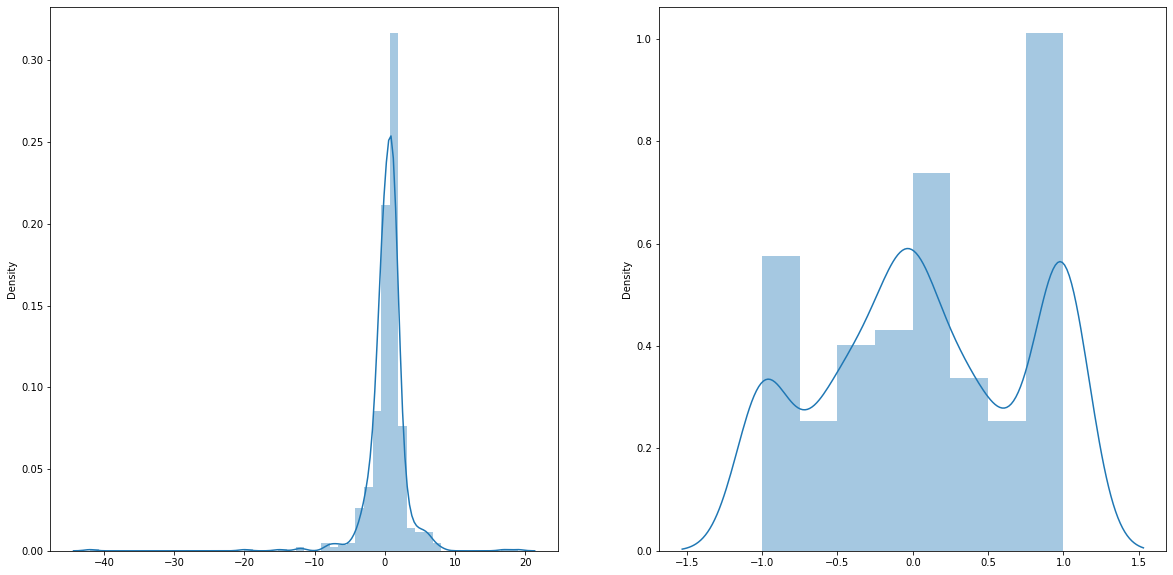

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 959/959 [00:01<00:00, 896.06it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


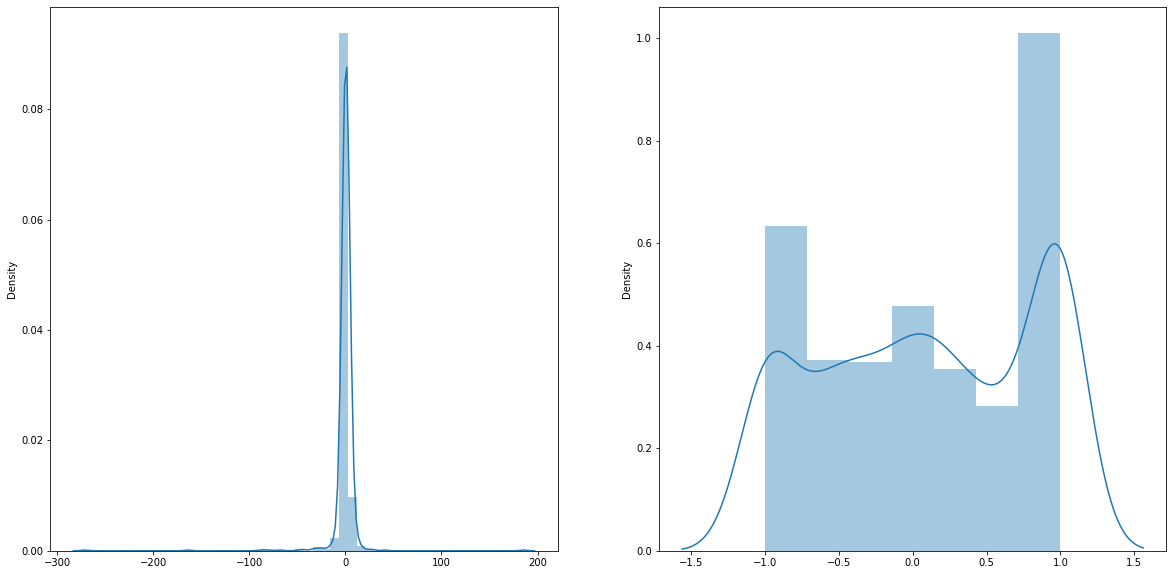

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

##### 모델 학습 - 방향

In [ ]:
method_vol = '2_방향'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_방향']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.093, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013],
 'el_clf__l1_ratio': [0.093, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.6s finished


done in 23.996s

Best score: 0.523
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.093
	tfidf_vect__min_df: 1
	tfidf_vect__ngram_range: (1, 2)


In [ ]:
model = grid_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.093, learning_rate='optimal',
                  

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5451388888888888


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 2736 variables and eliminated the other 76314 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 불러오기
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

##### score 산출 - 방향

In [ ]:
import pickle

# 감성 지수 저장
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

In [ ]:
coef[coef['score']!=0].sort_values(by='score')

,score
클레이,-1.074266
블록체인,-1.038302
거래,-0.827513
그램,-0.811365
이벤트,-0.804541
...,...
해킹,0.996311
테더,1.009773
바닥,1.016386
디파이,1.060918


In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 959/959 [00:06<00:00, 146.71it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


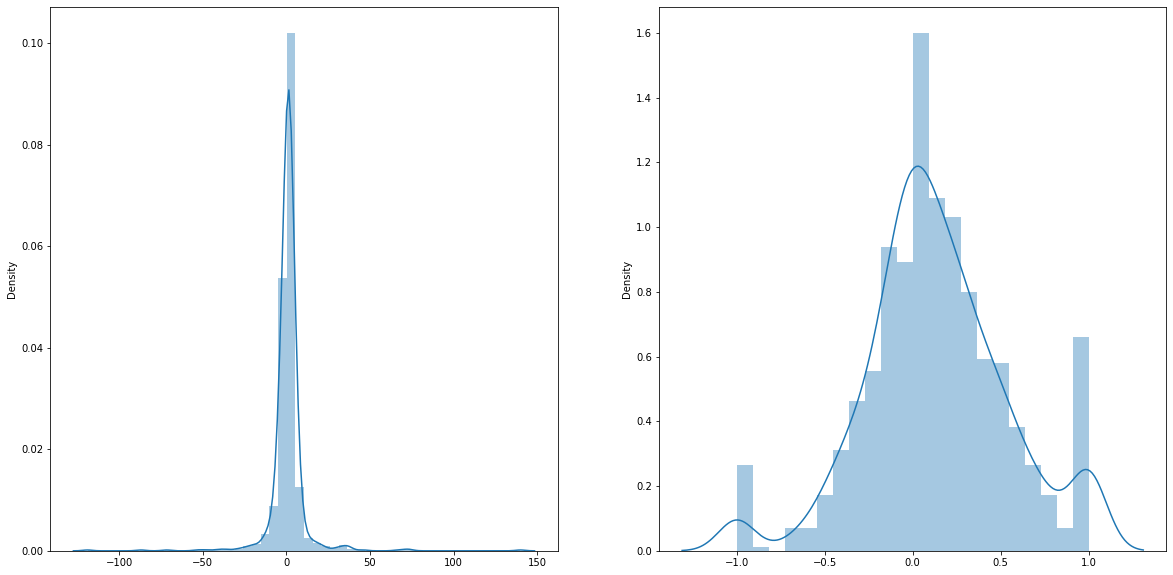

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 959/959 [00:01<00:00, 902.02it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


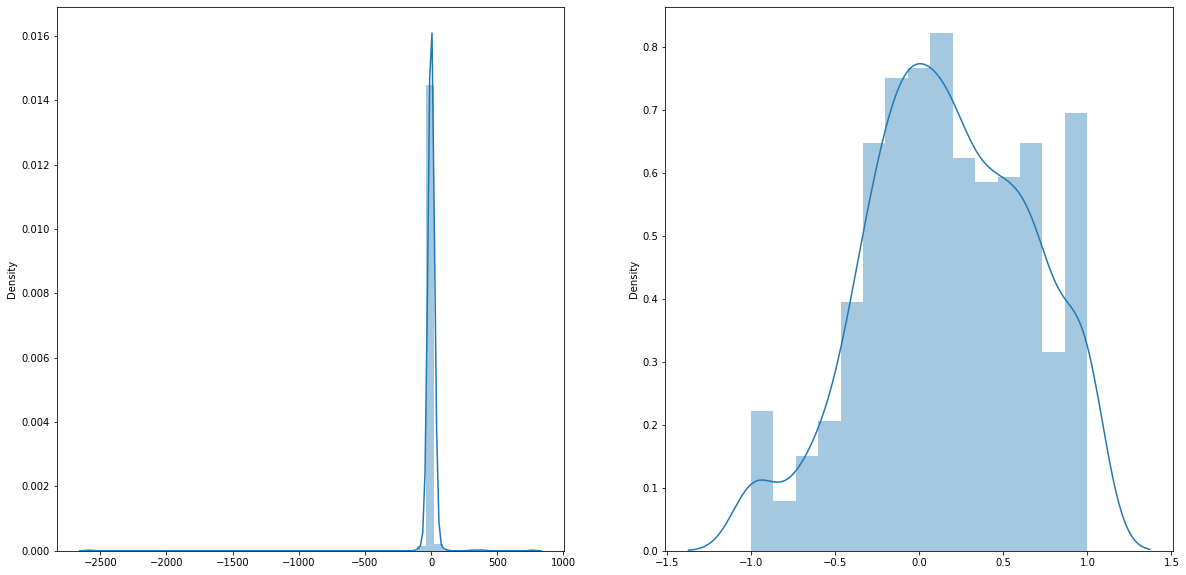

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

### 명사, 동사, 형용사

In [ ]:
pos = 'all'
df = pd.read_csv('community_'+pos+'_text_pos_tagged.csv')
print(df['변동성'].value_counts())

2    296
1    229
3    222
0    214
Name: 변동성, dtype: int64


In [ ]:
df = df[df['nouns'].notnull()]

In [ ]:
# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

#### 방법 1

In [ ]:
method_vol = '1'

##### 모델 학습

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_1'][df['변동성_1'].notnull()]
feature = df['nouns'][df['변동성_1'].notnull()]

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.09, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013, 0.0015], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013, 0.0015],
 'el_clf__l1_ratio': [0.09, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s


done in 15.099s

Best score: 0.570
Best parameters set:
	el_clf__alpha: 0.001
	el_clf__l1_ratio: 0.09
	tfidf_vect__min_df: 1
	tfidf_vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   15.0s finished


In [ ]:
model = grid_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.09, learning_rate='optimal',
                    

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5572519083969466


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 3084 variables and eliminated the other 3800 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출

In [ ]:
import pickle

# 감성 지수 불러오기
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 959/959 [00:06<00:00, 158.44it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


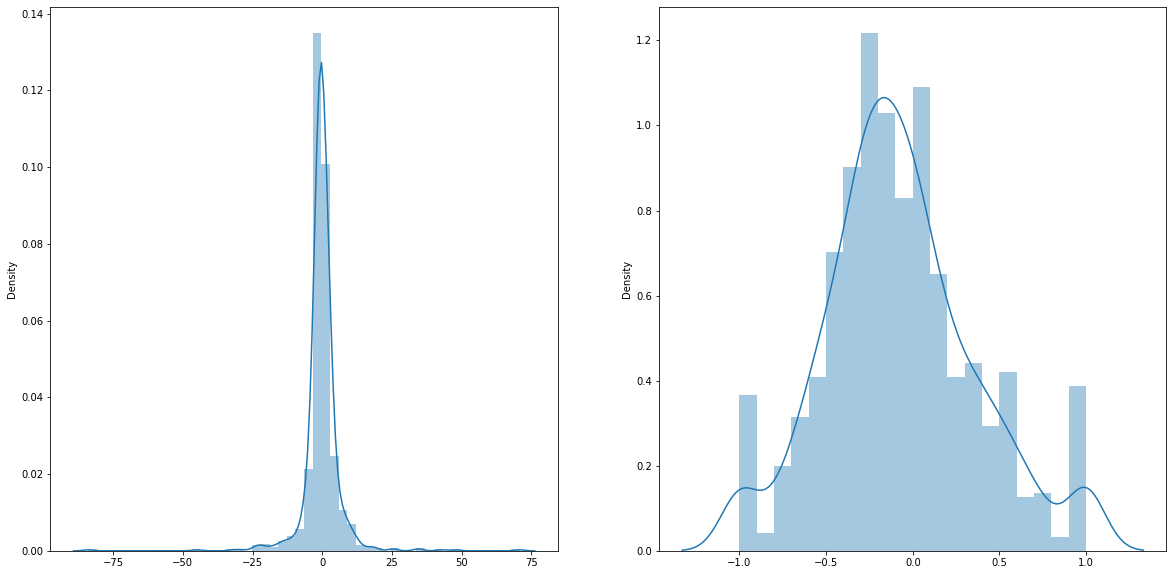

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

In [ ]:
'community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb'

('community_all_sen_score_count_1.pkl', 'wb')

100%|██████████| 959/959 [00:01<00:00, 856.83it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


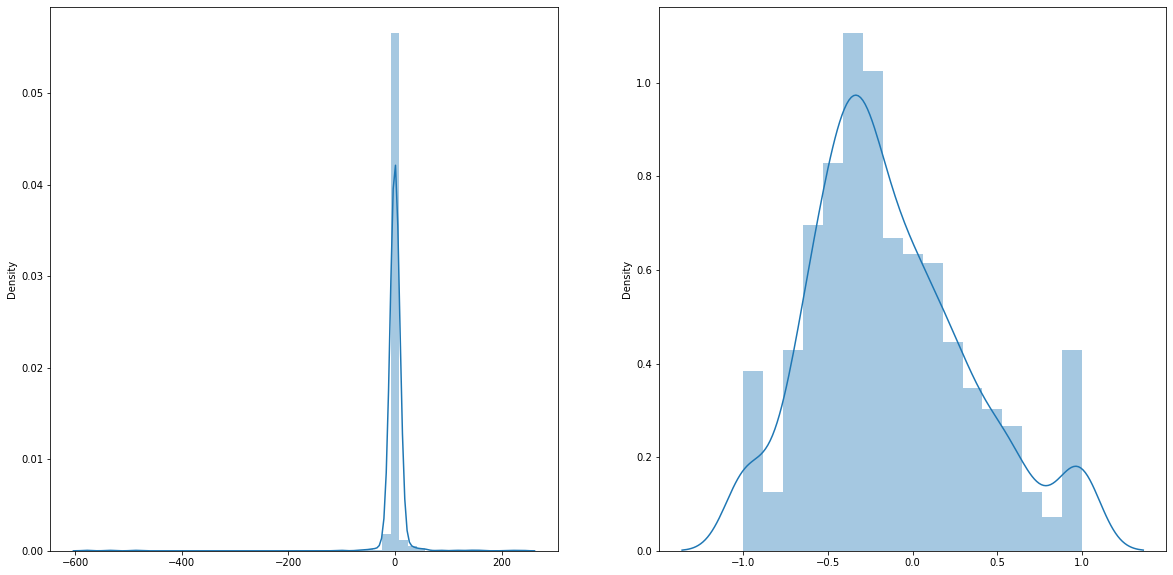

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

#### 방법 2

##### 모델 학습 - 크기

In [ ]:
method_vol = '2_크기'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_크기']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.093, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013],
 'el_clf__l1_ratio': [0.093, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s


done in 25.182s

Best score: 0.531
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.95
	tfidf_vect__min_df: 2
	tfidf_vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.1s finished


In [ ]:
model = grid_search.best_estimator_

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.95, learning_rate='optimal',
                   

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5659722222222222


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 18 variables and eliminated the other 5227 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)


##### score 산출 - 크기

In [ ]:
import pickle

# 감성 지수 불러오기
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 959/959 [00:00<00:00, 11787.86it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


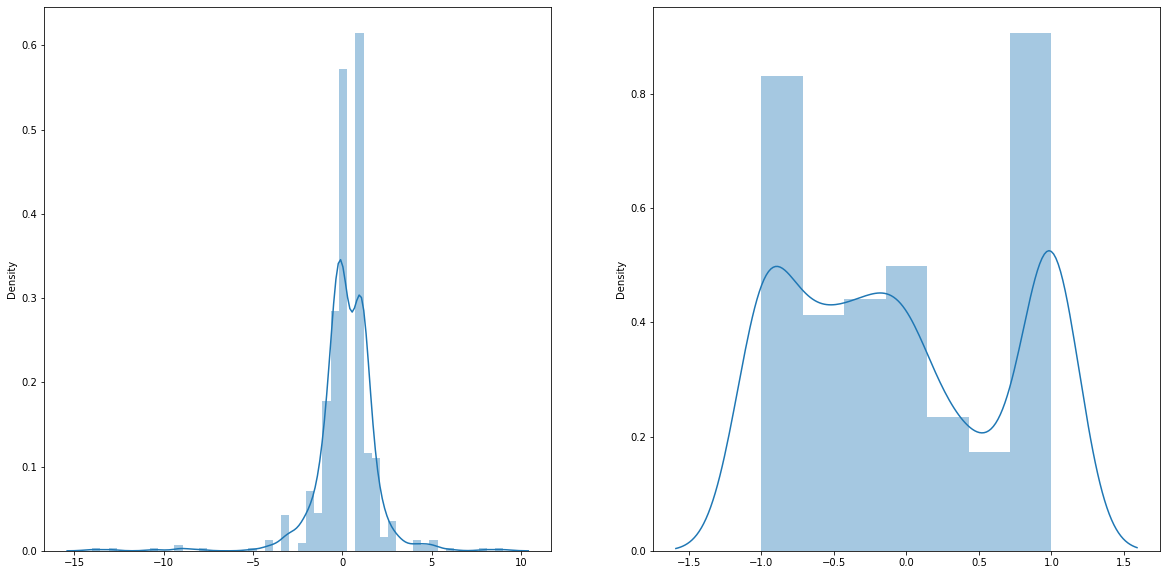

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 959/959 [00:01<00:00, 942.68it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


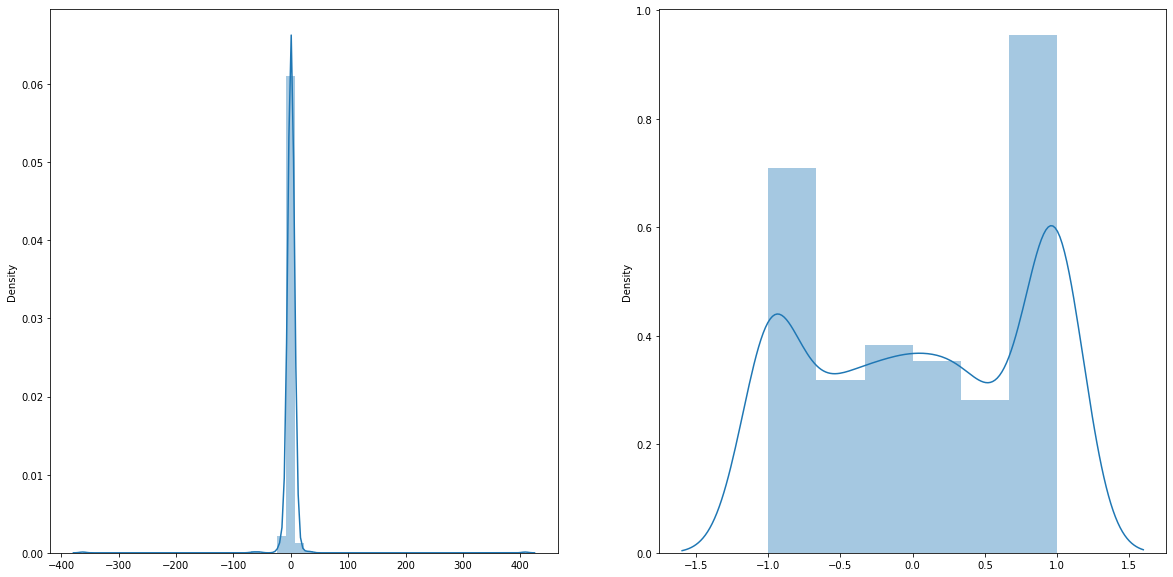

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

##### 모델 학습 - 방향

In [ ]:
method_vol = '2_방향'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_방향']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.05, 0.08, 0.09, 0.093], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013, 0.0015], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013, 0.0015],
 'el_clf__l1_ratio': [0.05, 0.08, 0.09, 0.093],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   50.6s finished


done in 50.984s

Best score: 0.513
Best parameters set:
	el_clf__alpha: 0.001
	el_clf__l1_ratio: 0.09
	tfidf_vect__min_df: 1
	tfidf_vect__ngram_range: (1, 2)


In [ ]:
model = grid_search.best_estimator_
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.09, learning_rate='optimal',
                    

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5381944444444444


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 5137 variables and eliminated the other 78175 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

In [ ]:
print('community_'+pos+'_sentiment_words_'+method_vol+'.pkl')

community_all_sentiment_words_2_방향.pkl


##### score 산출 - 방향

In [ ]:
import pickle

# 감성 지수 불러오기
with open('community_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

In [ ]:
print('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl')

community_all_sen_score_score_2_방향.pkl


100%|██████████| 959/959 [00:11<00:00, 80.92it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


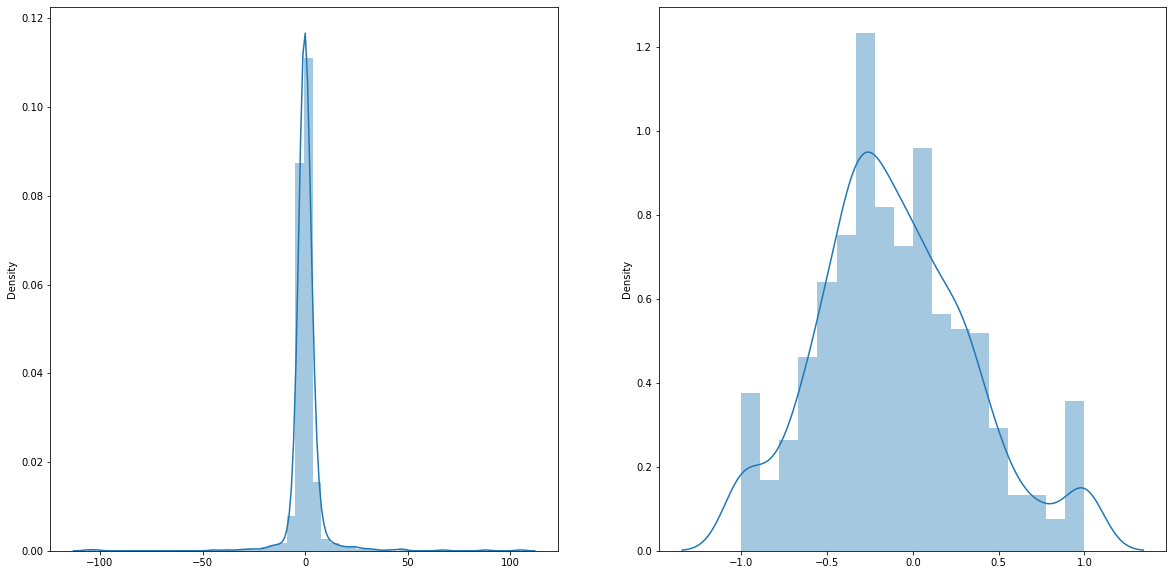

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 959/959 [00:01<00:00, 837.02it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


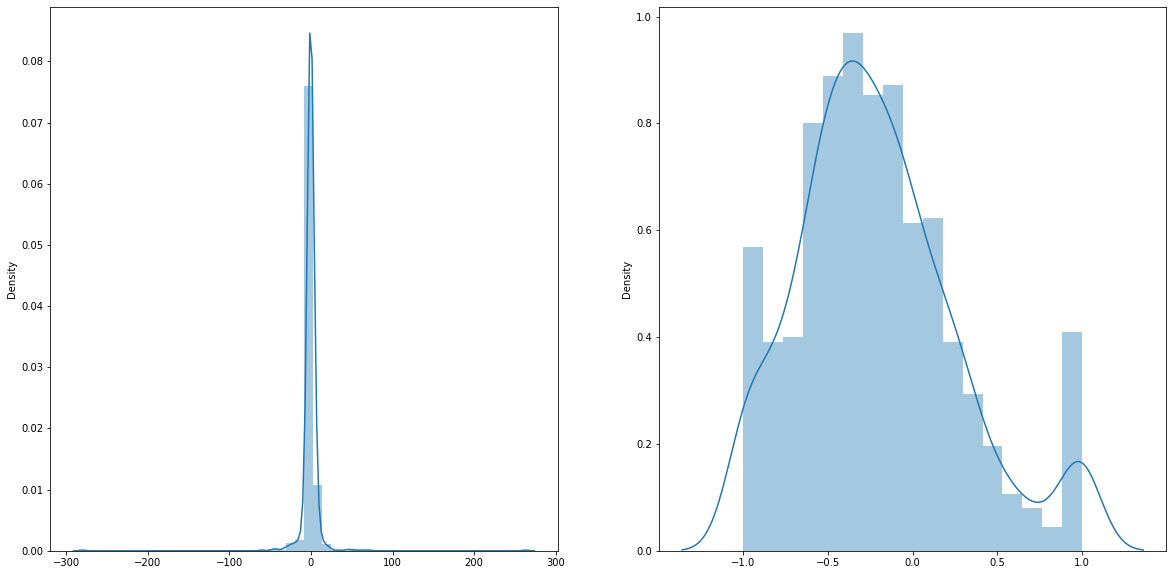

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

# 감성사전 성능 비교

In [ ]:
cd 'data/output'

In [ ]:
import pandas as pd
import numpy as np
import pickle

- 감성사전을 활용, score 산출 방식에 따라 변동성을 예측하였다.

In [ ]:
def check_accuracy(volatility, positive_class, score):
    from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
    import numpy as np

    volatility = [1 if p in positive_class else 0 for p in volatility]
    # mean_score = np.mean(score)
    predicted = [1 if p >= 0 else 0 for p in score]

    f1 = f1_score(volatility, predicted)
    acc = accuracy_score(volatility, predicted)
    pr = precision_score(volatility, predicted)
    rc = recall_score(volatility, predicted)

    print('F1 Score: %.3f\nAccuracy Score: %.3f\nPrecision Score: %.3f\nRecall Score: %.3f' % (f1, acc, pr, rc))

    return f1, acc

In [ ]:
result = {'pos_tag': [], 'method1': [], 'method2': [], 'formula': [], 'f1': [], 'acc': []}

#### 명사

In [ ]:
import pickle


pos = 'nouns'
method = 'count'

df = pd.read_csv('community_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.376
Accuracy Score: 0.640
Precision Score: 0.314
Recall Score: 0.468
--------------------------------------
F1 Score: 0.446
Accuracy Score: 0.728
Precision Score: 0.422
Recall Score: 0.473
============ 방법 2(크기) ============
F1 Score: 0.561
Accuracy Score: 0.578
Precision Score: 0.532
Recall Score: 0.594
--------------------------------------
F1 Score: 0.573
Accuracy Score: 0.595
Precision Score: 0.551
Recall Score: 0.596
============ 방법 2(방향) ============
F1 Score: 0.552
Accuracy Score: 0.483
Precision Score: 0.519
Recall Score: 0.591
--------------------------------------
F1 Score: 0.567
Accuracy Score: 0.484
Precision Score: 0.518
Recall Score: 0.625


In [ ]:
pos = 'nouns'
method = 'score'

df = pd.read_csv('community_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.394
Accuracy Score: 0.602
Precision Score: 0.304
Recall Score: 0.559
--------------------------------------
F1 Score: 0.455
Accuracy Score: 0.725
Precision Score: 0.420
Recall Score: 0.495
============ 방법 2(크기) ============
F1 Score: 0.573
Accuracy Score: 0.564
Precision Score: 0.517
Recall Score: 0.644
--------------------------------------
F1 Score: 0.553
Accuracy Score: 0.592
Precision Score: 0.551
Recall Score: 0.555
============ 방법 2(방향) ============
F1 Score: 0.565
Accuracy Score: 0.489
Precision Score: 0.523
Recall Score: 0.614
--------------------------------------
F1 Score: 0.549
Accuracy Score: 0.482
Precision Score: 0.518
Recall Score: 0.585


### 명사, 동사, 형용사

In [ ]:
pos = 'all'
method = 'score'

df = pd.read_csv('community_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.552
Accuracy Score: 0.729
Precision Score: 0.447
Recall Score: 0.721
--------------------------------------
F1 Score: 0.581
Accuracy Score: 0.761
Precision Score: 0.489
Recall Score: 0.716
============ 방법 2(크기) ============
F1 Score: 0.529
Accuracy Score: 0.528
Precision Score: 0.484
Recall Score: 0.583
--------------------------------------
F1 Score: 0.505
Accuracy Score: 0.571
Precision Score: 0.532
Recall Score: 0.482
============ 방법 2(방향) ============
F1 Score: 0.586
Accuracy Score: 0.643
Precision Score: 0.786
Recall Score: 0.467
--------------------------------------
F1 Score: 0.602
Accuracy Score: 0.674
Precision Score: 0.881
Recall Score: 0.458


In [ ]:
pos = 'all'
method = 'count'

df = pd.read_csv('community_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]


print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.613
Accuracy Score: 0.758
Precision Score: 0.487
Recall Score: 0.829
--------------------------------------
F1 Score: 0.625
Accuracy Score: 0.764
Precision Score: 0.495
Recall Score: 0.847
============ 방법 2(크기) ============
F1 Score: 0.496
Accuracy Score: 0.551
Precision Score: 0.506
Recall Score: 0.486
--------------------------------------
F1 Score: 0.511
Accuracy Score: 0.593
Precision Score: 0.564
Recall Score: 0.468
============ 방법 2(방향) ============
F1 Score: 0.727
Accuracy Score: 0.742
Precision Score: 0.850
Recall Score: 0.635
--------------------------------------
F1 Score: 0.770
Accuracy Score: 0.785
Precision Score: 0.913
Recall Score: 0.666


## 최종 점수 추출

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result[result['pos_tag']=='nouns'].sort_values(by=['f1'], ascending=False)

,pos_tag,method1,method2,formula,f1,acc
8,nouns,score,2_크기,sen_score1,0.573469,0.564129
3,nouns,count,2_크기,sen_score2,0.572687,0.595412
5,nouns,count,2_방향,sen_score2,0.566929,0.483837
10,nouns,score,2_방향,sen_score1,0.564831,0.489051
2,nouns,count,2_크기,sen_score1,0.561213,0.577685
9,nouns,score,2_크기,sen_score2,0.553143,0.592284
4,nouns,count,2_방향,sen_score1,0.552347,0.482795
11,nouns,score,2_방향,sen_score2,0.549411,0.481752
7,nouns,score,1,sen_score2,0.454545,0.724713
1,nouns,count,1,sen_score2,0.445860,0.727842


In [ ]:
result[result['pos_tag']=='all'].sort_values(by=['f1'], ascending=False)

,pos_tag,method1,method2,formula,f1,acc
23,all,count,2_방향,sen_score2,0.770089,0.785193
22,all,count,2_방향,sen_score1,0.727072,0.742440
19,all,count,1,sen_score2,0.624585,0.764338
18,all,count,1,sen_score1,0.613333,0.758081
17,all,score,2_방향,sen_score2,0.602287,0.673618
16,all,score,2_방향,sen_score1,0.585956,0.643379
13,all,score,1,sen_score2,0.581353,0.761210
12,all,score,1,sen_score1,0.551724,0.728884
14,all,score,2_크기,sen_score1,0.528616,0.527633
21,all,count,2_크기,sen_score2,0.511278,0.593326


In [ ]:
result = result.sort_values(by=['acc'], ascending=False)

In [ ]:
result.to_csv('community_final_score.csv', index=False)

In [ ]:
result.groupby('method2').head(1)

,pos_tag,method1,method2,formula,f1,acc
23,all,count,2_방향,sen_score2,0.770089,0.785193
19,all,count,1,sen_score2,0.624585,0.764338
3,nouns,count,2_크기,sen_score2,0.572687,0.595412


In [ ]:
final_score = pd.DataFrame(df['날짜'])


pos = 'all'
method = 'count'

method_vol = '1'

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)

final_score['커뮤니티_변동성_전체'] = sen_score['sen_score2']



pos = 'nouns'
method = 'count'

method_vol = '2_크기'

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)

final_score['커뮤니티_변동성_크기'] = sen_score['sen_score2']



pos = 'all'
method = 'count'

method_vol = '2_방향'

with open('community_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)

final_score['커뮤니티_변동성_방향'] = sen_score['sen_score2']

In [ ]:
final_score.to_csv('community_volatility.csv', index=False)

In [ ]:
final_score

,날짜,커뮤니티_변동성_전체,커뮤니티_변동성_크기,커뮤니티_변동성_방향
0,2021.04.30.,0.508772,NaN,0.320000
1,2021.04.29.,0.028571,1.000000,-0.200000
2,2021.04.28.,-0.020408,NaN,-0.523810
3,2021.04.27.,0.062500,0.142857,-0.037037
4,2021.04.26.,0.625000,NaN,0.568627
...,...,...,...,...
956,2018.08.05.,-0.052023,-0.538462,-0.085714
957,2018.08.04.,-0.440860,-0.250000,-0.180328
958,2018.08.03.,-0.750000,0.000000,-0.609756
959,2018.08.02.,-0.223881,0.294118,-0.500000


In [ ]:
# nan 값은 앞 뒤 데이터의 평균으로 보간
final_score['커뮤니티_변동성_방향'] = final_score['커뮤니티_변동성_방향'].interpolate()
final_score['커뮤니티_변동성_크기'] = final_score['커뮤니티_변동성_크기'].interpolate()
final_score['커뮤니티_변동성_전체'] = final_score['커뮤니티_변동성_전체'].interpolate()

In [ ]:
# 가장 첫 행에 보간되지 않은 값이 존재하여 그 다음 행의 값으로 보간
final_score['커뮤니티_변동성_크기'] = final_score['커뮤니티_변동성_크기'].fillna(1)

In [ ]:
final_score.to_csv('community_volatility_interpolated.csv', index=False)